In [92]:
from ultralytics import YOLO
from tkinter import filedialog
import cv2
import easyocr
import os
from PIL import Image
from define import *
import matplotlib.pyplot as plt

In [93]:
model_path = 'D:/IT04/hk3/License_Plate/task/EasyOCR/yolov8n/train1/weights/best.pt'
model = YOLO(model_path)

In [95]:
file_path = filedialog.askopenfilename(title="Open Image File", filetypes=[("Image files", "*.png *.jpg *.jpeg")])

image = Image.open(file_path)
image.save(select)
image = cv2.imread(select)
pos_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Hiển thị ảnh gốc đã chọn

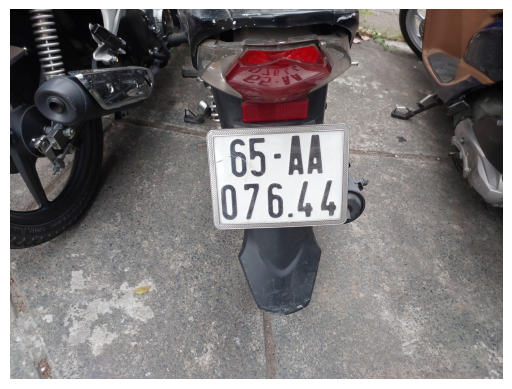

In [96]:
plt.imshow(pos_img)
plt.axis("off")
plt.show()

In [97]:
# Tạo thư mục nếu nó chưa tồn tại
crop_dir = 'crop' # chứa khung biển số đã cắt
if not os.path.exists(crop_dir):
    os.makedirs(crop_dir)
    print("Thư mục chứa ảnh cắt đã tạo thành công !")

ocr_dir = 'ocr' # chứa khung biển số đã sử dụng ocr
if not os.path.exists(ocr_dir):
    os.makedirs(ocr_dir)
    print("Thư mục chứa ảnh cắt dùng OCR đã tạo thành công !")

select_dir = 'selected' # hình gốc
if not os.path.exists(select_dir):
    os.makedirs(select_dir)
    print("Thư mục chứa ảnh gốc đã tạo thành công !")
select_path = os.path.join(select_dir, f'selected_image.jpg')
cv2.imwrite(select_path, image)

detected_dir = 'results' # hình đã nhận dạng
if not os.path.exists(detected_dir):
    os.makedirs(detected_dir)
    print("Thư mục chứa ảnh đă được nhận diện đã tạo thành công !")

In [98]:
results = model(image)

print(results)


0: 480x640 1 Plate, 159.3ms
Speed: 4.5ms preprocess, 159.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Plate'}
obb: None
orig_img: array([[[  7,   6,   8],
        [  6,   5,   7],
        [  6,   5,   7],
        ...,
        [ 40,  65,  97],
        [ 41,  66,  98],
        [ 41,  66,  98]],

       [[  6,   5,   7],
        [  6,   5,   7],
        [  5,   4,   6],
        ...,
        [ 41,  66,  98],
        [ 41,  66,  98],
        [ 40,  65,  97]],

       [[  4,   3,   5],
        [  4,   3,   5],
        [  5,   4,   6],
        ...,
        [ 43,  66,  98],
        [ 42,  65,  97],
        [ 41,  64,  96]],

       ...,

       [[176, 178, 179],
        [172, 174, 175],
        [165, 167, 168],
        ...,
        [134, 129, 130],
        [134, 129, 130],
        [133, 128, 129]],

       [[166, 168, 169],

Kết quả sau khi nhận diện khung biển số

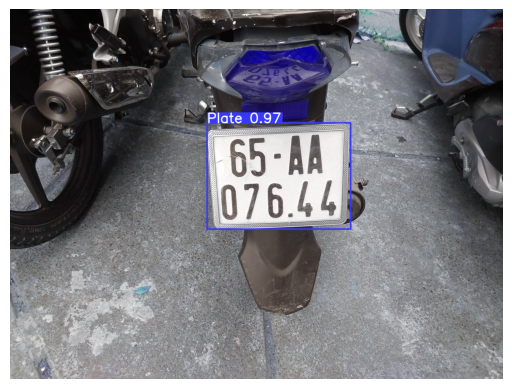

In [99]:
for r in results:
        img_arr = r.plot()         
        img = Image.fromarray(img_arr[..., ::-1])
        images = img.save('img_detected.jpg')

img = cv2.imread('img_detected.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [100]:
index = 0
img_crop = []
for r in results:
    boxes = r.boxes.data.tolist()
    for box in boxes:
        x1, y1, x2, y2, _, _ = [int(x) for x in box]
        print("x1: {}, y1: {}, x2: {}, y2: {}".format(x1, y1, x2, y2))
        # cắt ảnh
        cropped_image = image[y1:y2, x1:x2]
        # lưu ảnh cắt trong crop
        crop_path = os.path.join(crop_dir, f'cropped_image_{index}.jpg')
        cv2.imwrite(crop_path, cropped_image)
        img_crop.append(crop_path)
        imageLP = cropped_image.copy()
        gray_image_lp = cv2.cvtColor(imageLP, cv2.COLOR_BGR2GRAY)
        
        #lọc nhiễu
        gray_image_lp = cv2.GaussianBlur(gray_image_lp, (5, 5), 0)

        _, crop_object_threshold = cv2.threshold(gray_image_lp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        crop_object_threshold = cv2.morphologyEx(crop_object_threshold, cv2.MORPH_OPEN, kernel)

        cropgray_path = os.path.join(ocr_dir, f'cropped_image_{index}.jpg')
        cv2.imwrite(cropgray_path, crop_object_threshold)


x1: 1599, y1: 923, x2: 2763, y2: 1784


kết quả khung biển số đã được cắt

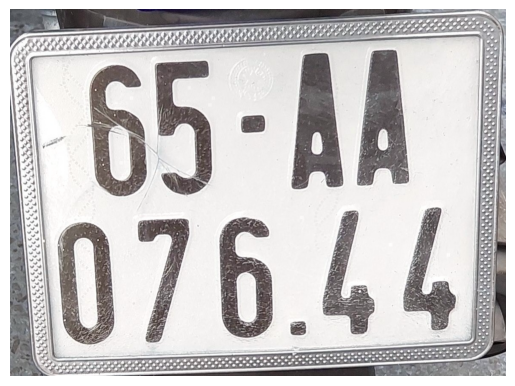

In [101]:
img_path = cv2.imread('D:\IT04\hk3\License_Plate\\task\EasyOCR\crop\cropped_image_0.jpg')
plt.imshow(img_path)
plt.axis('off')
plt.show()

kết quả khi dùng ocr

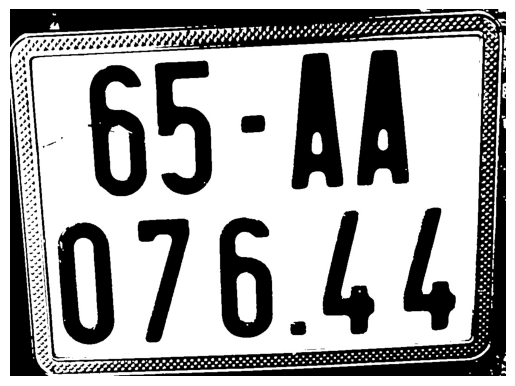

In [102]:
img_ocr = cv2.imread("D:\IT04\hk3\License_Plate\\task\EasyOCR\ocr\cropped_image_0.jpg")
plt.imshow(img_ocr)
plt.axis('off')
plt.show()

đọc chuỗi ký tự

In [103]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(f'D:\IT04\hk3\License_Plate\\task\EasyOCR\ocr\cropped_image_0.jpg', detail=0)
text_line = ' '.join(result)
print("Biển số: ", text_line)        

Using CPU. Note: This module is much faster with a GPU.


Biển số:  65-AA 076.44
